In [10]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import END, START, add_messages
from langgraph.graph.state import StateGraph
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.tools import tool
from langchain_core.messages import BaseMessage
from langchain_groq import ChatGroq
from IPython.display import Image, display
import os
from dotenv import load_dotenv

load_dotenv()

True

In [12]:
os.environ["GROQ_API_KEY"] = os.getenv("Groq_API_KEY")
os.environ["langsmith_API_KEY"] = os.getenv("LangSmith_API_KEY")
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = "agenticlanggraph"

In [13]:
# Initialize LLM
llm = ChatGroq(model="deepseek-r1-distill-llama-70b")


In [14]:

# Define State
class State(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]



In [15]:
# Define tool
@tool
def add(a: int, b: int) -> int:
    """Add two numbers."""
    return a + b

# Create tools list (not ToolNode yet)
tools = [add]  # This should be a list of tools

# Bind tools to LLM
llm_with_tools = llm.bind_tools(tools)

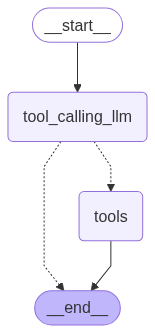

In [ ]:
# Define the tool calling function
def tool_calling_llm(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build the workflow graph
graph = StateGraph(State)

# Add nodes
graph.add_node("tool_calling_llm", tool_calling_llm)
graph.add_node("tools", ToolNode(tools))  # Now create ToolNode with the tools list

# Add edges
graph.add_edge(START, "tool_calling_llm")
graph.add_conditional_edges(
    "tool_calling_llm",
    tools_condition,
)
graph.add_edge("tools", END)

# Compile the graph
graphbuilder = graph.compile()

# Display the graph
display(Image(graphbuilder.get_graph().draw_mermaid_png()))

In [17]:
messages = graphbuilder.invoke({
    "messages": "What is the latest research on quantum computing?"
})

for m in messages['messages']:
   m.pretty_print()

================================ Human Message =================================

What is the latest research on quantum computing?
================================== Ai Message ==================================

Quantum computing is a rapidly evolving field, and there have been several significant advancements in recent years. Here are some of the latest developments and research areas in quantum computing as of 2023:

### 1. **Quantum Processors and Hardware**
   - **IBM Quantum**: IBM has been continuously advancing its quantum processors, with recent announcements including processors with over 1,000 qubits. IBM has also made strides in reducing error rates and improving coherence times.
   - **Google Quantum**: Google has been working on its 72-qubit "Quantum Supremacy" processor and has demonstrated quantum supremacy in various experiments, showing that quantum computers can perform certain tasks exponentially faster than classical computers.
   - **Rigetti Computing**: Rigetti 

In [18]:
messages = graphbuilder.invoke({
    "messages": "add 2 and 3"
})

for m in messages['messages']:
   m.pretty_print()

================================ Human Message =================================

add 2 and 3
================================== Ai Message ==================================
Tool Calls:
  add (rve0y20pt)
 Call ID: rve0y20pt
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: add

5
